# Analysis of wind production 


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Charger les données : X7 ehighway
path_wind = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_eol\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.Wind.nc"
data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)



C:\Users\flore\AppData\Local\Temp\ipykernel_33760\2147302885.py:3: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)


(1000,)


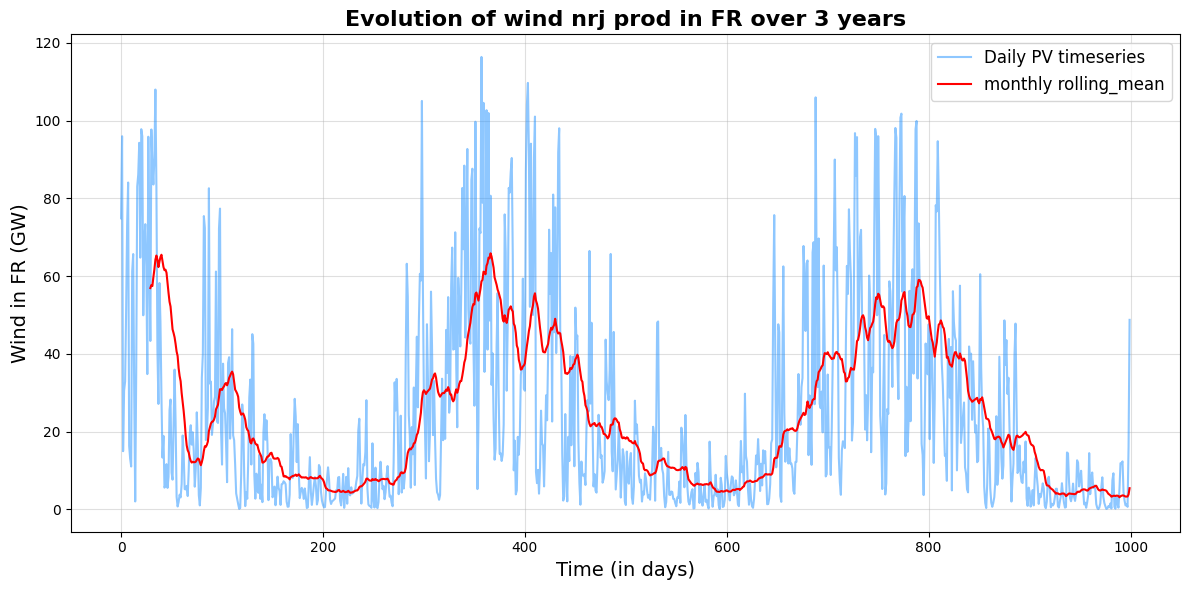

In [ ]:
#Evolution of wind nrj prod in FR over 3 years

# Extraire une tranche des données
data_to_plot = data_wind.Wind_FR.isel(time=slice(0, 8000), lat=0, lon=0)  # Ajustez la tranche de temps

# Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
data_to_plot_in_GW = data_to_plot / 1e9  # Conversion de W*10^10 en GW

# daily mean 
data_to_plot_in_GW  = data_to_plot_in_GW.resample(time='D').mean()
# rolling mean
rolling_mean = data_to_plot_in_GW.rolling(time=30).mean()
# Convertir les données en tableau numpy pour le fit
data_values = data_to_plot_in_GW.values.flatten()
print(data_values.shape)


# Créer un nuage de points avec les données brutes
plt.figure(figsize=(12, 6))
plt.plot(range(len(data_values)), data_values, color='dodgerblue', label='Daily PV timeseries', alpha=0.5)

# Tracer la courbe gaussienne ajustée
plt.plot(rolling_mean, color='red', label=f'monthly rolling_mean')
# Ajouter un titre, des étiquettes d'axes et une légende
plt.title("Evolution of wind nrj prod in FR over 3 years", fontsize=16, fontweight='bold')
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("Wind in FR (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()




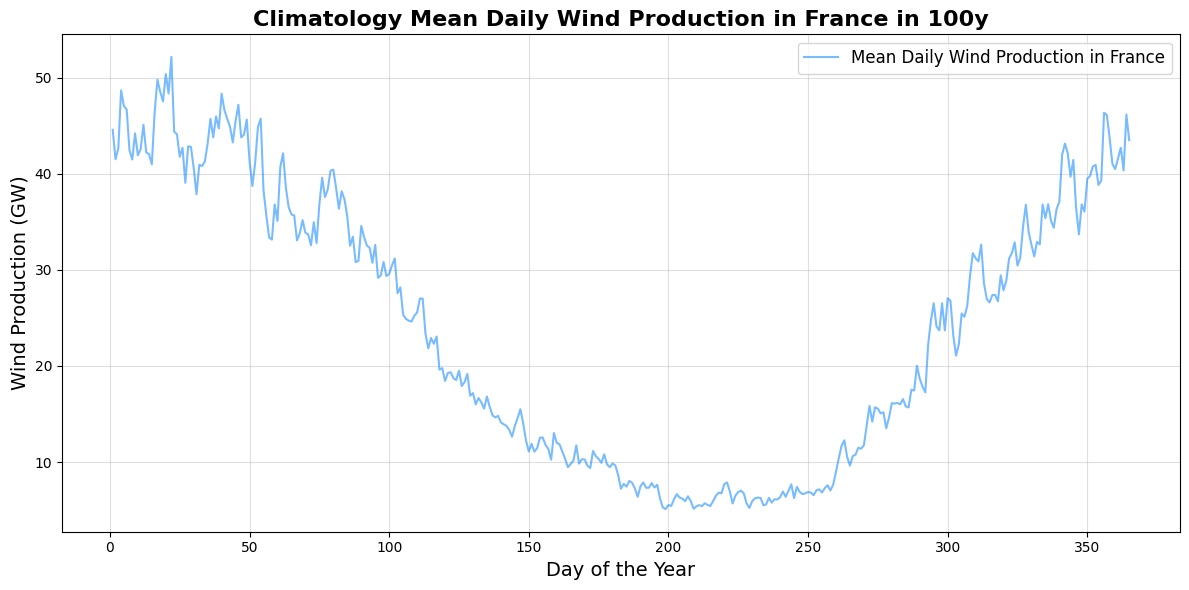

In [ ]:
#Climatologie in France in 100y

# Extraire une tranche des données (par exemple pour la France)
data_to_plot = data_wind['Wind_FR'].isel(time=slice(0, 290000), lat=0, lon=0)  # Ajuste ici si nécessaire

# Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
data_to_plot_in_GW = data_to_plot / 1e9  # Conversion de W*10^10 en GW

# Resampling à une fréquence journalière
data_daily = data_to_plot_in_GW.resample(time='D').mean()

# Extraire le jour de l'année et l'année
data_daily['day_of_year'] = data_daily['time'].dt.dayofyear
data_daily['year'] = data_daily['time'].dt.year

# Calculer la moyenne pour chaque jour de l'année, en regroupant par 'day_of_year' et en prenant la moyenne sur 'time'
daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')



# Visualisation avec un nuage de points (scatter plot)
plt.figure(figsize=(12, 6))

# Tracer la courbe
plt.plot(daily_mean_per_day['day_of_year'], daily_mean_per_day, color='dodgerblue', label='Mean Daily Wind Production in France', alpha=0.6)




# Ajouter un titre et des labels
plt.title("Climatology Mean Daily Wind Production in France in 100y", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()





for selected countries

In [8]:

# Liste des pays à analyser
countries = ['BE', 'UK', 'DK', 'ES', 'DE', 'FR']


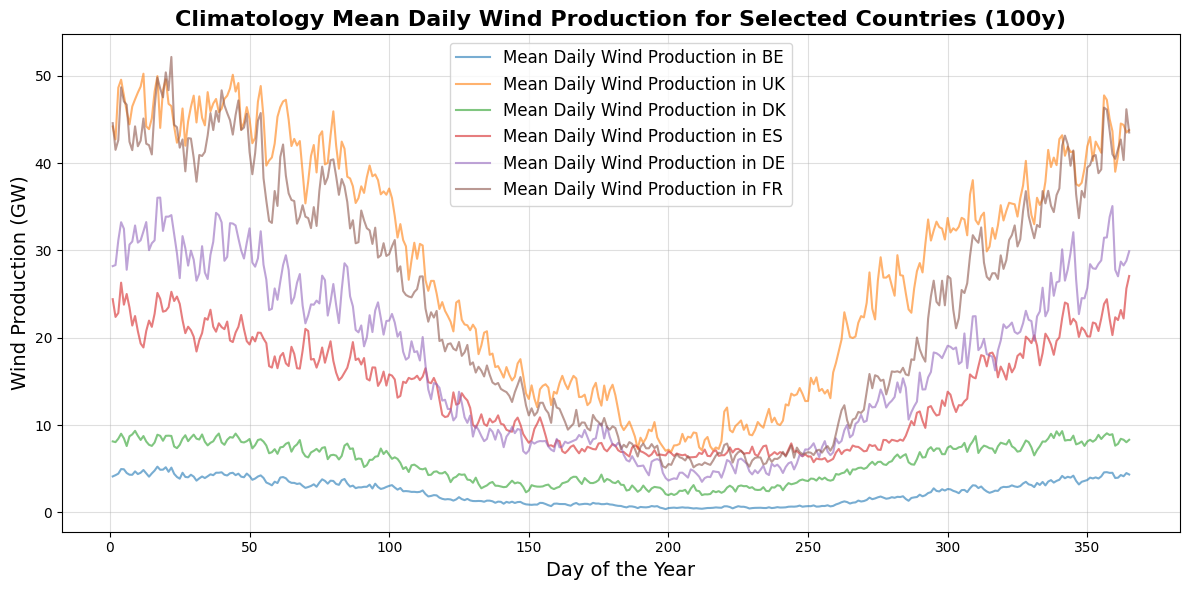

In [9]:

# Initialiser une figure pour afficher les résultats
plt.figure(figsize=(12, 6))

# Itérer sur la liste des pays
for country in countries:
    # Vérifier si la variable pour ce pays existe dans data_wind
    country_var = f'Wind_{country}'  # Exemple: 'Wind_FR', 'Wind_UK', etc.
    
    if country_var in data_wind.variables:
        # Extraire les données pour chaque pays
        data_to_plot = data_wind[country_var].isel(time=slice(0, 290000), lat=0, lon=0)  # Ajuste si nécessaire
        
        # Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
        data_to_plot_in_GW = data_to_plot / 1e9  # Conversion en GW
        
        # Resampling à une fréquence journalière
        data_daily = data_to_plot_in_GW.resample(time='D').mean()
        
        # Extraire le jour de l'année et l'année
        data_daily['day_of_year'] = data_daily['time'].dt.dayofyear
        data_daily['year'] = data_daily['time'].dt.year
        
        # Calculer la moyenne pour chaque jour de l'année
        daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')
        
        # Tracer la courbe pour chaque pays
        plt.plot(daily_mean_per_day['day_of_year'], daily_mean_per_day, label=f'Mean Daily Wind Production in {country}', alpha=0.6)

# Ajouter un titre, des labels et une légende
plt.title("Climatology Mean Daily Wind Production for Selected Countries (100y)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\flore\AppData\Local\Temp\ipykernel_56028\3043066426.py:21: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_56028\3043066426.py:21: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_56028\3043066426.py:21: DeprecationWarning: Usage of 'use_cfti

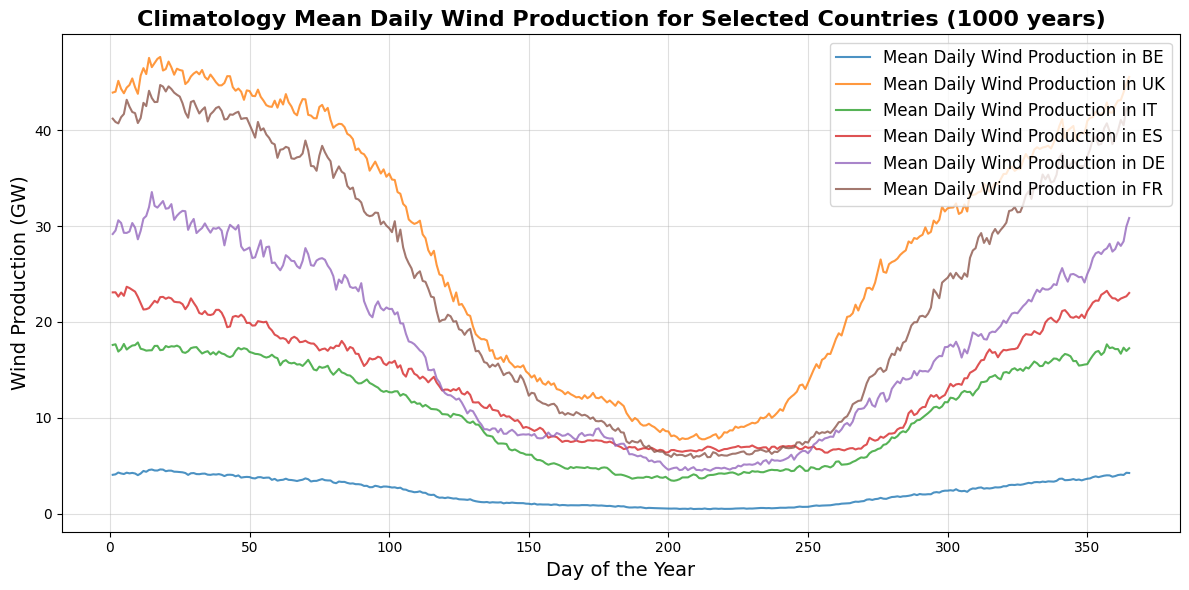

In [22]:

# Créer une figure pour afficher les résultats
plt.figure(figsize=(12, 6))

# Itérer sur chaque pays
for country in countries:
    all_daily_means = []

    # Itérer à travers les différents batchs
    for batch_id in range(1, 11):  # Pour batch_0001 à batch_0010
        # Générer le chemin du fichier pour chaque batch
        batch_str = f"batch_{batch_id:04d}"  # Format batch_0001, batch_0002, ..., batch_0010
        path_wind = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_eol\\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.eHighway.X7.Wind.nc"
        
        # Charger les données pour le batch actuel
        data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)

        # Construire le nom de la variable pour chaque pays (ex: 'Wind_FR', 'Wind_UK', etc.)
        country_var = f'Wind_{country}'
        
        if country_var in data_wind.variables:
            # Extraire les données pour chaque pays
            data_to_plot = data_wind[country_var].isel(time=slice(0, 290000), lat=0, lon=0)  # Ajuste si nécessaire
            
            # Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
            data_to_plot_in_GW = data_to_plot / 1e9  # Conversion en GW
            
            # Resampling à une fréquence journalière
            data_daily = data_to_plot_in_GW.resample(time='D').mean()
            
            # Extraire le jour de l'année
            data_daily['day_of_year'] = data_daily['time'].dt.dayofyear

            # Calculer la moyenne pour chaque jour de l'année sur la période du batch
            daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')
            
            # Ajouter cette moyenne à la liste de tous les batchs pour le pays
            all_daily_means.append(daily_mean_per_day)

    # Combiner les résultats de tous les batchs pour obtenir la moyenne sur 1000 ans
    combined_mean_per_day = xr.concat(all_daily_means, dim='batch')

    # Calculer la moyenne sur l'axe des batchs
    final_mean_per_day = combined_mean_per_day.mean(dim='batch')

    # Tracer la courbe pour chaque pays
    plt.plot(final_mean_per_day['day_of_year'], final_mean_per_day, label=f'Mean Daily Wind Production in {country}', alpha=0.8)

# Ajouter un titre, des labels et une légende
plt.title("Climatology Mean Daily Wind Production for Selected Countries (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()





C:\Users\flore\AppData\Local\Temp\ipykernel_56028\2041369118.py:6: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)


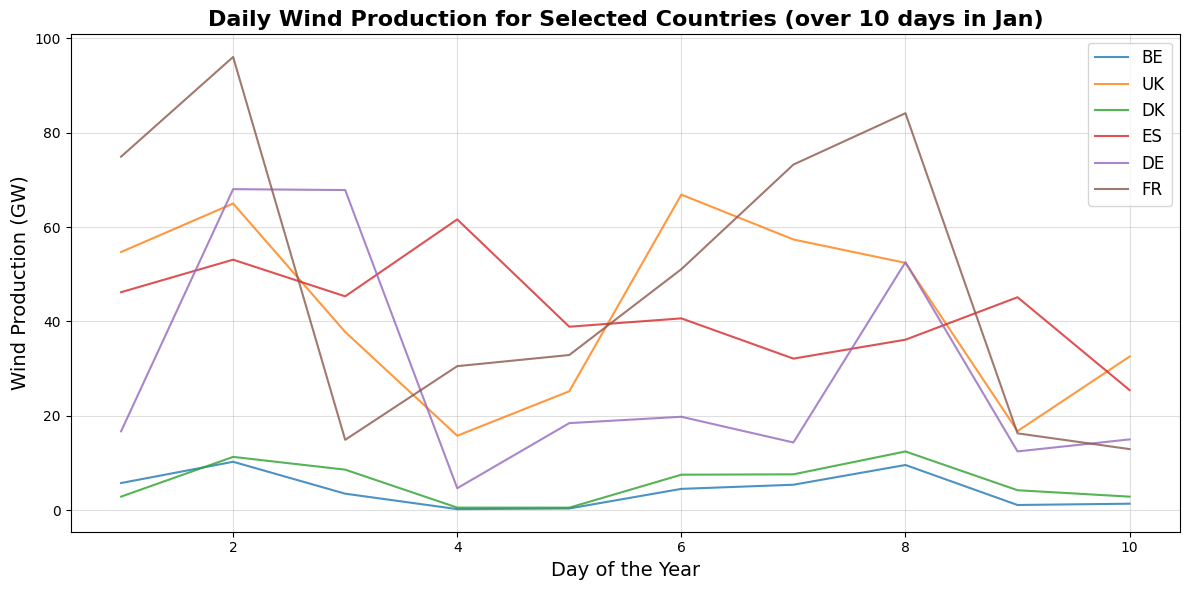

In [24]:

# Créer une figure pour afficher les résultats
plt.figure(figsize=(12, 6))

# Itérer sur chaque pays
for country in countries:
    # Construire le nom de la variable pour chaque pays (ex: 'Wind_FR', 'Wind_UK', etc.)
    country_var = f'Wind_{country}'
    
    if country_var in data_wind.variables:
        # Extraire les données pour le pays avec la tranche de temps spécifiée
        data_to_plot = data_wind[country_var].isel(time = slice (0,80), lat=0, lon=0)  # Ajuste ici si nécessaire
        
        # Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
        data_to_plot_in_GW = data_to_plot / 1e9  # Conversion en GW

        # Resampling à une fréquence journalière
        data_daily = data_to_plot_in_GW.resample(time='D').mean()
        
        # Extraire le jour de l'année
        data_daily['day_of_year'] = data_daily['time'].dt.dayofyear
        
        # Calculer la moyenne pour chaque jour de l'année
        daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')
        
        # Tracer la courbe pour le pays
        plt.plot(daily_mean_per_day['day_of_year'], daily_mean_per_day, label=f'{country}', alpha=0.8)

# Ajouter un titre, des labels et une légende
plt.title("Daily Wind Production for Selected Countries (over 10 days in Jan)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()


sum over europe

C:\Users\flore\AppData\Local\Temp\ipykernel_56028\1069849694.py:19: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_56028\1069849694.py:19: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_56028\1069849694.py:19: DeprecationWarning: Usage of 'use_cfti

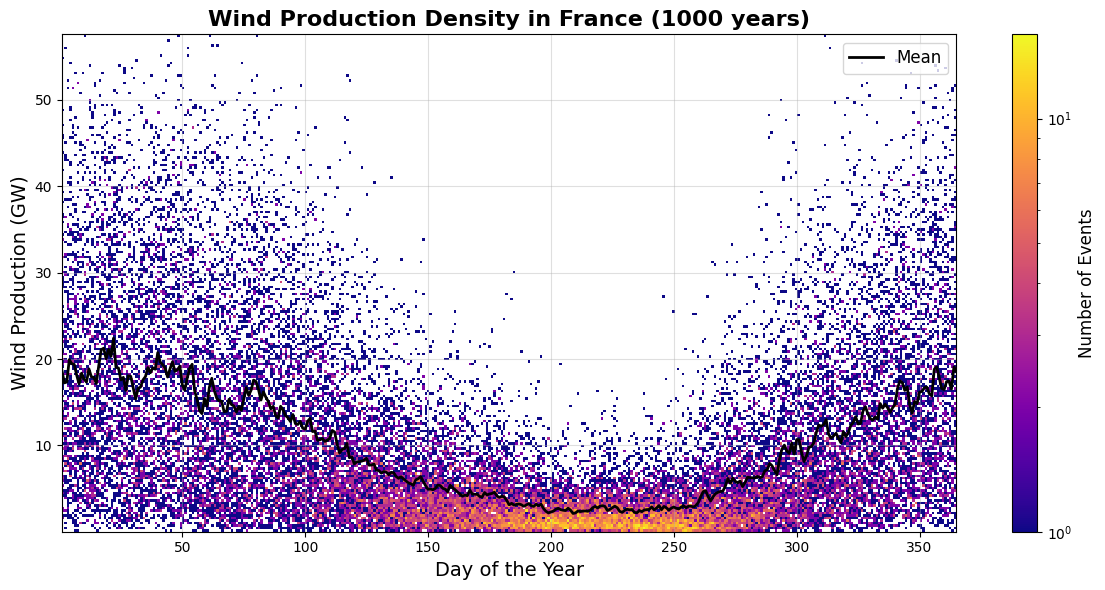

<xarray.DataArray 'Wind_FR' (batch: 10, time: 36500)> Size: 3MB
array([[31.96714401, 43.76887894,  7.96520138, ..., 26.34383011,
        20.66283607, 14.1737833 ],
       [31.98164368, 43.74716568,  7.96102428, ...,  7.79973221,
         7.1179285 , 17.01555634],
       [31.96582031, 43.77682114,  7.98352957, ..., 35.0219574 ,
        41.62427521, 24.81616783],
       ...,
       [31.95119858, 43.73372269,  7.98375225, ..., 18.70974731,
        34.57448196, 39.45640182],
       [31.98695564, 43.75873184,  7.96378613, ..., 25.41658974,
        15.46295452,  7.14729023],
       [31.98633766, 43.75063324,  7.96641779, ..., 29.727005  ,
        25.79912567, 23.89401817]], shape=(10, 36500))
Coordinates:
    lon          float64 8B 0.0
    lat          float64 8B 0.0
  * time         (time) object 292kB 0001-01-01 00:00:00 ... 0100-12-31 00:00:00
    day_of_year  (time) int64 292kB 1 2 3 4 5 6 7 ... 360 361 362 363 364 365
Dimensions without coordinates: batch


In [27]:

# Pays sélectionné
country = 'FR'

# Liste pour collecter toutes les données des batchs
all_days = []

# Itérer sur les 10 batchs
for batch_id in range(1, 11):
    # Générer le chemin du fichier pour chaque batch
    batch_str = f"batch_{batch_id:04d}"  # Format batch_0001, batch_0002, ..., batch_0010
    path_wind = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_eol\\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.TYNDP.NT.Wind.nc"
    
    # Charger les données pour le batch actuel
    data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)

    # Vérifier si la variable du pays existe dans le batch
    country_var = f'Wind_{country}'
    if country_var in data_wind.variables:
        # Extraire la variable du pays et convertir en GW
        data_to_plot = data_wind[country_var].isel(lat=0, lon=0) / 1e9  # Conversion en GW

        # Resampler à une fréquence journalière
        data_daily = data_to_plot.resample(time='D').mean()

        # Extraire les jours de l'année et ajouter à la liste
        data_daily['day_of_year'] = data_daily['time'].dt.dayofyear
        all_days.append(data_daily)

# Combiner toutes les données des batchs
combined_data = xr.concat(all_days, dim='batch')

# Extraire toutes les valeurs de production et les jours de l'année
day_of_year = combined_data['day_of_year'].values.flatten()
wind_values = combined_data.values.flatten()

# Assurez-vous que les longueurs de day_of_year et wind_values sont les mêmes
min_length = min(len(day_of_year), len(wind_values))
day_of_year = day_of_year[:min_length]
wind_values = wind_values[:min_length]

# Créer le graphique
plt.figure(figsize=(12, 6))

# Histogramme bidimensionnel (densité des points)
plt.hist2d(day_of_year, wind_values, bins=[365, 200], cmap='plasma', norm=LogNorm())

# Ajouter une échelle de couleur
cbar = plt.colorbar()
cbar.set_label('Number of Events', fontsize=12)

# Calculer et tracer la moyenne pour chaque jour de l'année
mean_per_day = [np.nanmean(wind_values[day_of_year == day]) for day in range(1, 366)]
plt.plot(range(1, 366), mean_per_day, color='black', linewidth=2, label='Mean')

# Ajouter les détails du graphique
plt.title("Wind Production Density in France (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Afficher les valeurs de combined_data
# Afficher les valeurs de combined_data
print(combined_data)



C:\Users\flore\AppData\Local\Temp\ipykernel_3892\438500896.py:21: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_3892\438500896.py:21: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_3892\438500896.py:21: DeprecationWarning: Usage of 'use_cftime' as

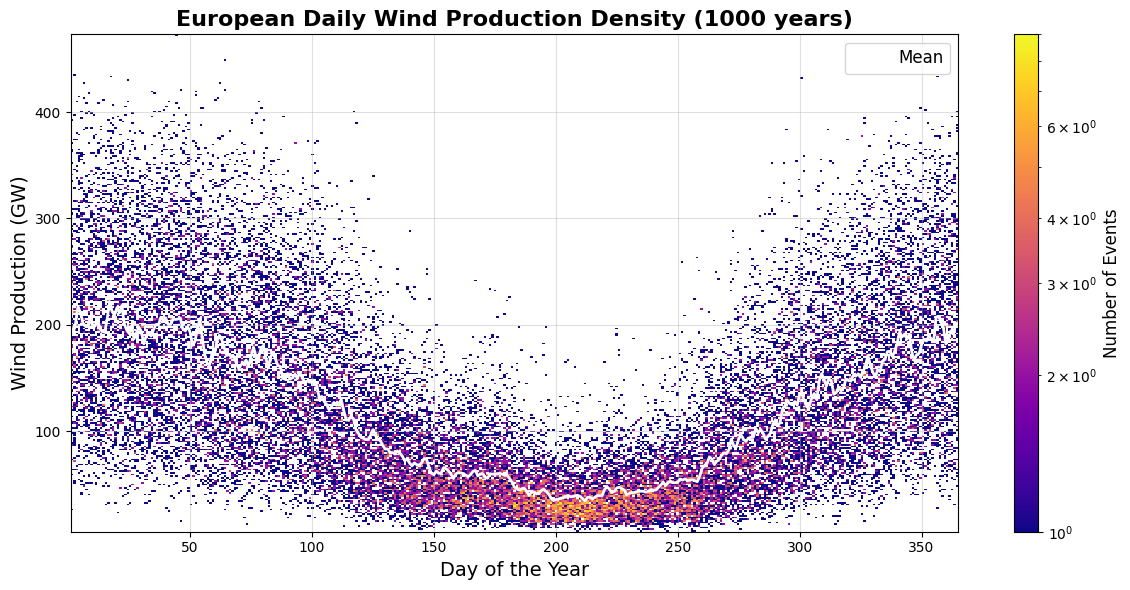

In [ ]:

# Liste des pays européens
countries = [
    "AT", "BE", "DK", "FR", "DE", "IE", "IT",
    "NL", "NO", "PT", "ES", "SE", "CH", "UK"]

# Liste pour collecter toutes les sommes journalières
all_daily_sums = []

# Itérer sur les 10 batchs
for batch_id in range(1, 11):
    # Générer le chemin du fichier pour chaque batch
    batch_str = f"batch_{batch_id:04d}"  # Format batch_0001, batch_0002, ..., batch_0010
    path_wind = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_eol\\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.eHighway.X7.Wind.nc"
    
    # Charger les données pour le batch actuel
    data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
    
    # Liste pour stocker les données journalières des pays
    daily_sums_per_batch = []
    
    # Itérer sur les pays pour calculer la somme journalière
    for country in countries:
        country_var = f'Wind_{country}'
        if country_var in data_wind.variables:
            # Extraire la production pour le pays et convertir en GW
            data_to_plot = data_wind[country_var].isel(lat=0, lon=0) / 1e9  # Conversion en GW
            
            # Resampler à une fréquence journalière
            data_daily = data_to_plot.resample(time='D').mean()
            
            # Ajouter aux données journalières
            daily_sums_per_batch.append(data_daily)
    
    # Calculer la somme journalière pour tous les pays dans ce batch
    total_daily_sum = sum(daily_sums_per_batch)
    
    # Extraire les jours de l'année
    total_daily_sum['day_of_year'] = total_daily_sum['time'].dt.dayofyear
    
    # Ajouter à la liste globale
    all_daily_sums.append(total_daily_sum)

# Combiner les données de tous les batchs
combined_data = xr.concat(all_daily_sums, dim='batch')

# Extraire toutes les valeurs de production et les jours de l'année
day_of_year = combined_data['day_of_year'].values.flatten()
wind_values = combined_data.values.flatten()

# Assurez-vous que les longueurs de day_of_year et wind_values sont les mêmes
min_length = min(len(day_of_year), len(wind_values))
day_of_year = day_of_year[:min_length]
wind_values = wind_values[:min_length]

# Créer le graphique
plt.figure(figsize=(12, 6))

# Histogramme bidimensionnel (densité des points)
plt.hist2d(day_of_year, wind_values, bins=[365, 300], cmap='plasma', norm=LogNorm())

# Ajouter une échelle de couleur
cbar = plt.colorbar()
cbar.set_label('Number of Events', fontsize=12)

# Calculer et tracer la moyenne pour chaque jour de l'année
mean_per_day = [np.nanmean(wind_values[day_of_year == day]) for day in range(1, 366)]
plt.plot(range(1, 366), mean_per_day, color='white', linewidth=2, label='Mean')

# Ajouter les détails du graphique
plt.title("European Daily Wind Production Density (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()





C:\Users\flore\AppData\Local\Temp\ipykernel_58948\1370592998.py:22: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_58948\1370592998.py:22: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_58948\1370592998.py:22: DeprecationWarning: Usage of 'use_cfti

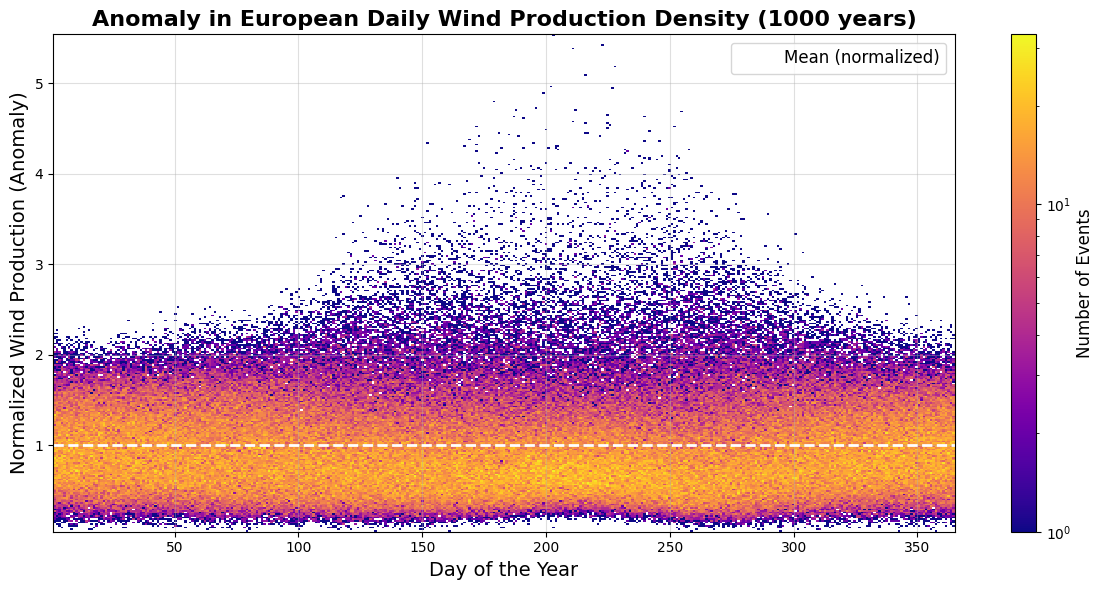

In [7]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm

# Liste des pays européens
countries = [
    "AT", "BE", "DK", "FR", "DE", "IE", "IT",
    "NL", "NO", "PT", "ES", "SE", "CH", "UK"
]

# Liste pour collecter toutes les sommes journalières
all_daily_sums = []

# Itérer sur les 10 batchs
for batch_id in range(1, 11):
    # Générer le chemin du fichier pour chaque batch
    batch_str = f"batch_{batch_id:04d}"  # Format batch_0001, batch_0002, ..., batch_0010
    path_wind = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_eol\\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.eHighway.X7.Wind.nc"
    
    # Charger les données pour le batch actuel
    data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
    
    # Liste pour stocker les données journalières des pays
    daily_sums_per_batch = []
    
    # Itérer sur les pays pour calculer la somme journalière
    for country in countries:
        country_var = f'Wind_{country}'
        if country_var in data_wind.variables:
            # Extraire la production pour le pays et convertir en GW
            data_to_plot = data_wind[country_var].isel(lat=0, lon=0) / 1e9  # Conversion en GW
            
            # Resampler à une fréquence journalière
            data_daily = data_to_plot.resample(time='D').mean()
            
            # Ajouter aux données journalières
            daily_sums_per_batch.append(data_daily)
    
    # Calculer la somme journalière pour tous les pays dans ce batch
    total_daily_sum = sum(daily_sums_per_batch)
    
    # Extraire les jours de l'année
    total_daily_sum['day_of_year'] = total_daily_sum['time'].dt.dayofyear
    
    # Ajouter à la liste globale
    all_daily_sums.append(total_daily_sum)

# Combiner les données de tous les batchs
combined_data = xr.concat(all_daily_sums, dim='time')

# Calculer la moyenne annuelle de la production PV
annual_mean = combined_data.groupby('day_of_year').mean()

# Calculer les anomalies : diviser chaque valeur par la moyenne annuelle
anomalies = combined_data.groupby('day_of_year') / annual_mean

# Extraire les jours de l'année et les anomalies
day_of_year = combined_data['day_of_year'].values
Wind_anomalies = anomalies.values.flatten()

# Créer le graphique
plt.figure(figsize=(12, 6))

# Histogramme bidimensionnel (densité des points)
plt.hist2d(day_of_year, Wind_anomalies, bins=[365, 300], cmap='plasma', norm=LogNorm())

# Ajouter une échelle de couleur
cbar = plt.colorbar()
cbar.set_label('Number of Events', fontsize=12)

# Tracer une ligne horizontale à 1 (la moyenne normalisée)
plt.axhline(1, color='white', linestyle='--', linewidth=2, label='Mean (normalized)')

# Ajouter les détails du graphique
plt.title("Anomaly in European Daily Wind Production Density (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Normalized Wind Production (Anomaly)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\flore\AppData\Local\Temp\ipykernel_58948\1232982898.py:21: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_58948\1232982898.py:21: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_58948\1232982898.py:21: DeprecationWarning: Usage of 'use_cfti

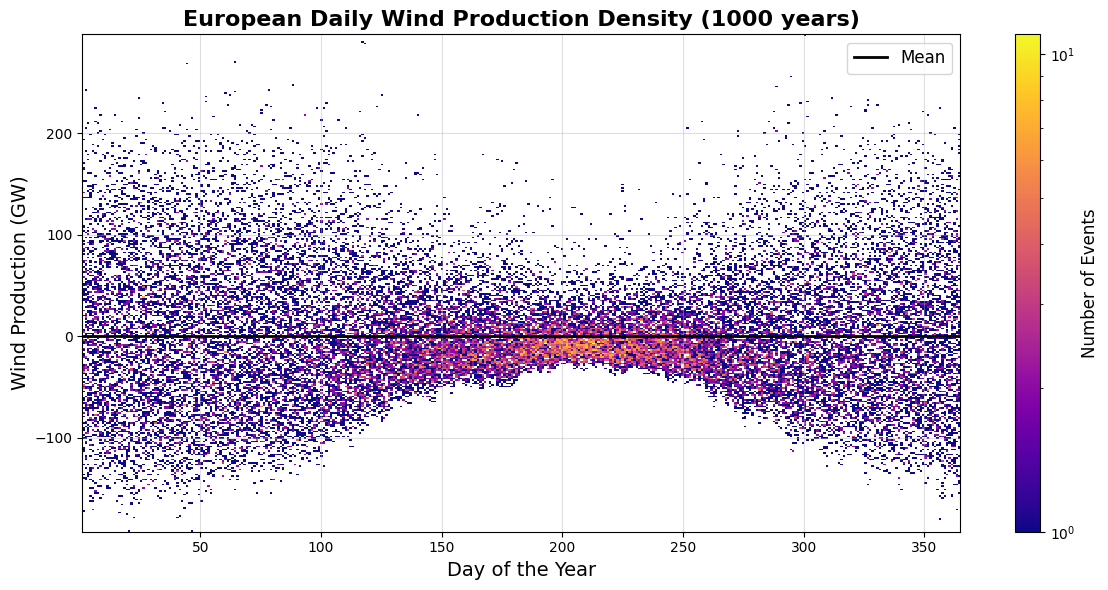

In [13]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm

# Liste des pays européens
countries = [
    "AT", "BE", "DK", "FR", "DE", "IE", "IT",
    "NL", "NO", "PT", "ES", "SE", "CH", "UK"]

# Liste pour collecter toutes les sommes journalières
all_daily_sums = []

# Itérer sur les 10 batchs
for batch_id in range(1, 11):
    # Générer le chemin du fichier pour chaque batch
    batch_str = f"batch_{batch_id:04d}"  # Format batch_0001, batch_0002, ..., batch_0010
    path_wind = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_eol\\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.eHighway.X7.Wind.nc"
    
    # Charger les données pour le batch actuel
    data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
    
    # Liste pour stocker les données journalières des pays
    daily_sums_per_batch = []
    
    # Itérer sur les pays pour calculer la somme journalière
    for country in countries:
        country_var = f'Wind_{country}'
        if country_var in data_wind.variables:
            # Extraire la production pour le pays et convertir en GW
            data_to_plot = data_wind[country_var].isel(lat=0, lon=0) / 1e9  # Conversion en GW
            
            # Resampler à une fréquence journalière
            data_daily = data_to_plot.resample(time='D').mean()
            
            # Ajouter aux données journalières
            daily_sums_per_batch.append(data_daily)
    
    # Calculer la somme journalière pour tous les pays dans ce batch
    total_daily_sum = sum(daily_sums_per_batch)
    
    # Extraire les jours de l'année
    total_daily_sum['day_of_year'] = total_daily_sum['time'].dt.dayofyear
    
    # Ajouter à la liste globale
    all_daily_sums.append(total_daily_sum)

# Combiner les données de tous les batchs
combined_data = xr.concat(all_daily_sums, dim='batch')

# Extraire toutes les valeurs de production et les jours de l'année
day_of_year = combined_data['day_of_year'].values.flatten()
wind_values = combined_data.values.flatten()

# Assurez-vous que les longueurs de day_of_year et wind_values sont les mêmes
min_length = min(len(day_of_year), len(wind_values))
day_of_year = day_of_year[:min_length]
wind_values = wind_values[:min_length]

# Créer le graphique
plt.figure(figsize=(12, 6))

# Histogramme bidimensionnel (densité des points)
#plt.hist2d(day_of_year, wind_values, bins=[365, 300], cmap='plasma', norm=LogNorm())

# Calculer et tracer la moyenne pour chaque jour de l'année
mean_per_day = [np.nanmean(wind_values[day_of_year == day]) for day in range(1, 366)]
mean_per_day = np.array(mean_per_day)

# Soustraire la moyenne quotidienne pour centrer les données autour de 0
wind_values_centered = wind_values - np.tile(mean_per_day, len(wind_values) // 365 + 1)[:len(wind_values)]

# Histogramme bidimensionnel (densité des points) avec les valeurs centrées
hist = plt.hist2d(day_of_year, wind_values_centered, bins=[365, 300], cmap='plasma', norm=LogNorm())
plt.plot(range(1, 366), np.zeros(365), color='black', linewidth=2, label='Mean')


# Ajouter une échelle de couleur
cbar = plt.colorbar(hist[3])
cbar.set_label('Number of Events', fontsize=12)



# Ajouter les détails du graphique
plt.title("European Daily Wind Production Density (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Charger les données
path_wind = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_eol\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.Wind.nc"
data_wind = xr.open_mfdataset(path_wind, use_cftime=True, decode_times=True)

# Liste des pays à traiter
countries = ['BE', 'UK', 'DK', 'ES', 'DE', 'FR']

# Initialiser une figure pour afficher les résultats
plt.figure(figsize=(12, 6))

# Itérer sur la liste des pays
for country in countries:
    # Vérifier si la variable pour ce pays existe dans data_wind
    country_var = f'Wind_{country}'  # Exemple: 'Wind_FR', 'Wind_UK', etc.
    
    if country_var in data_wind.variables:
        # Extraire les données pour chaque pays
        data_to_plot = data_wind[country_var].isel(time=slice(0, 290000), lat=0, lon=0)  # Ajuste si nécessaire
        
        # Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
        data_to_plot_in_GW = data_to_plot / 1e9  # Conversion en GW
        
        # Resampling à une fréquence journalière
        data_daily = data_to_plot_in_GW.resample(time='D').mean()
        
        # Extraire le jour de l'année et l'année
        data_daily['day_of_year'] = data_daily['time'].dt.dayofyear
        data_daily['year'] = data_daily['time'].dt.year
        
        # Calculer la moyenne pour chaque jour de l'année
        daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')

        #Normaliser la production du pays 
        daily_mean_per_day = daily_mean_per_day / daily_mean_per_day.mean()
        
        # Tracer la courbe pour chaque pays
        plt.plot(daily_mean_per_day['day_of_year'], daily_mean_per_day, label=f'Mean Daily Wind Production in {country}', alpha=0.6)

# Ajouter un titre, des labels et une légende
plt.title("Climatology Mean Daily Wind Production for Selected Countries", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

a partir de la aggregation spatiale 

C:\Users\flore\AppData\Local\Temp\ipykernel_68040\894969359.py:6: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)


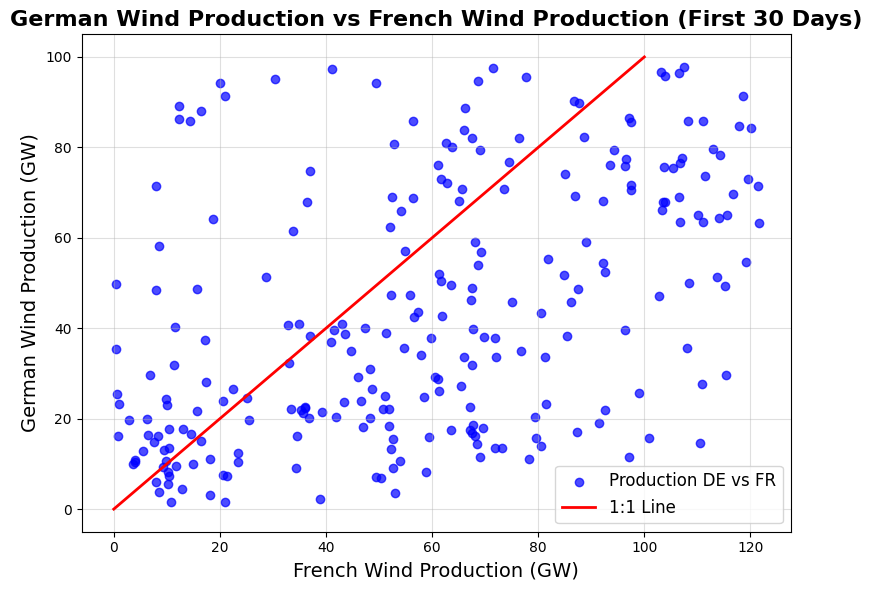

In [13]:
import matplotlib.pyplot as plt
import xarray as xr

# Charger le fichier pour batch_0001
path_wind = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_eol\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.Wind.nc"
data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)

# Extraire les variables pour la France et l'Allemagne
wind_FR = data_wind['Wind_FR'].isel(time=slice(0, 248), lat=0, lon=0)  # France
wind_DE = data_wind['Wind_DE'].isel(time=slice(0, 248), lat=0, lon=0)  # Allemagne

# Convertir les valeurs de W*10^10 en GW
wind_FR_GW = wind_FR / 1e9
wind_DE_GW = wind_DE / 1e9

# Créer un nuage de points (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(wind_FR_GW, wind_DE_GW, color='blue', alpha=0.7, label='Production DE vs FR')
#créer une ligne de pente 1 tout le long du graphe
plt.plot([0, 100], [0, 100], color='red', linestyle='-', linewidth=2, label='1:1 Line')

# Ajouter un titre et des labels
plt.title("German Wind Production vs French Wind Production (First 30 Days)", fontsize=16, fontweight='bold')
plt.xlabel("French Wind Production (GW)", fontsize=14)
plt.ylabel("German Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\flore\AppData\Local\Temp\ipykernel_58948\244308014.py:8: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)


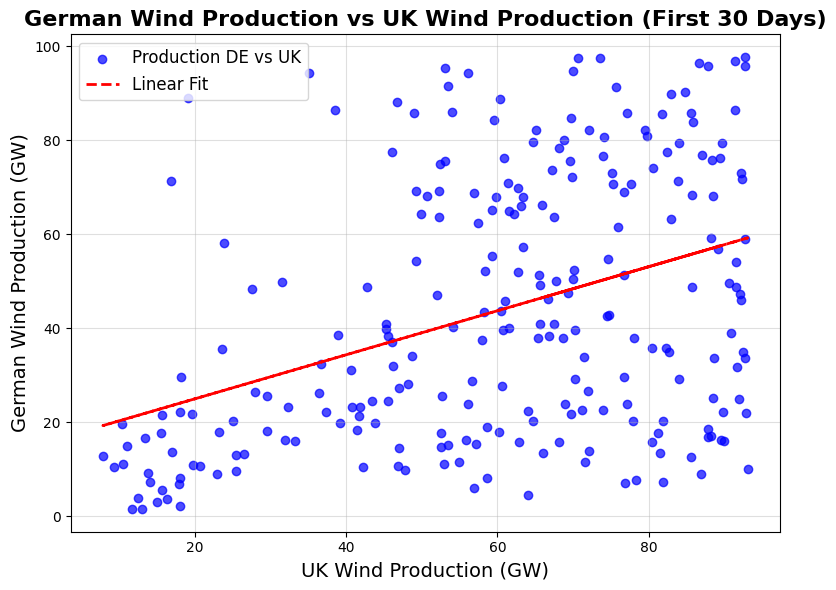

In [6]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np


# Charger le fichier pour batch_0001
path_wind = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_eol\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.Wind.nc"
data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)

# Extraire les variables pour la UK et l'Allemagne
wind_UK = data_wind['Wind_UK'].isel(time=slice(0, 248), lat=0, lon=0)  # UK
wind_DE = data_wind['Wind_DE'].isel(time=slice(0, 248), lat=0, lon=0)  # Allemagne

# Convertir les valeurs de W*10^10 en GW
wind_UK_GW = wind_UK / 1e9
wind_DE_GW = wind_DE / 1e9

# Calculer la regression linéaire et la plotter sur le graphe
slope, intercept = np.polyfit(wind_UK_GW, wind_DE_GW, 1)
fit = slope * wind_UK_GW + intercept
#plt.plot(wind_UK_GW, fit, color='red', linestyle='--', linewidth=2, label='Linear Fit')

# Créer un nuage de points (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(wind_UK_GW, wind_DE_GW, color='blue', alpha=0.7, label='Production DE vs UK')

#créer une ligne de pente 1 tout le long du graphe
#plt.plot([0, 100], [0, 100], color='red', linestyle='-', linewidth=2, label='1:1 Line')

plt.plot(wind_UK_GW, fit, color='red', linestyle='--', linewidth=2, label='Linear Fit')
# Ajouter un titre et des labels
plt.title("German Wind Production vs UK Wind Production (First 30 Days)", fontsize=16, fontweight='bold')
plt.xlabel("UK Wind Production (GW)", fontsize=14)
plt.ylabel("German Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\flore\AppData\Local\Temp\ipykernel_68040\4246919929.py:6: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)


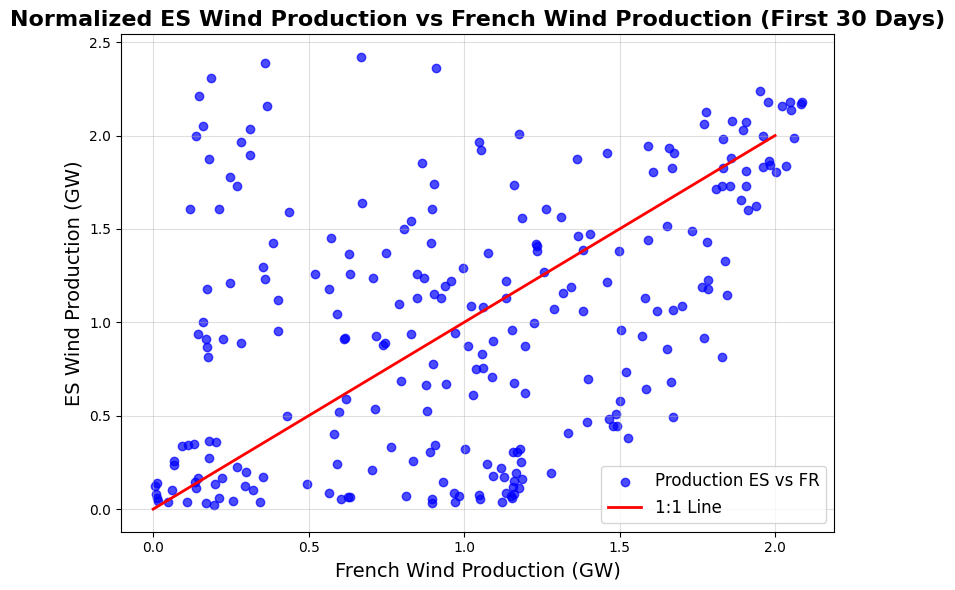

In [22]:
import matplotlib.pyplot as plt
import xarray as xr

# Charger le fichier pour batch_0001
path_wind = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_eol\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.Wind.nc"
data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)

# Extraire les variables pour la France et l'ES
wind_FR = data_wind['Wind_FR'].isel(time=slice(0, 248), lat=0, lon=0)  # France
wind_ES = data_wind['Wind_ES'].isel(time=slice(0, 248), lat=0, lon=0)  # ES

# Convertir les valeurs de W*10^10 en GW
wind_FR_GW = wind_FR / 1e9
wind_FR_GW_ = wind_FR_GW / wind_FR_GW.mean()
wind_ES_GW = wind_ES / 1e9
wind_ES_GW_ = wind_ES_GW / wind_ES_GW.mean()

# Créer un nuage de points (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(wind_FR_GW_, wind_ES_GW_, color='blue', alpha=0.7, label='Production ES vs FR')
#créer une ligne de pente 1 tout le long du graphe
plt.plot([0, 2], [0, 2], color='red', linestyle='-', linewidth=2, label='1:1 Line')

# Ajouter un titre et des labels
plt.title("Normalized ES Wind Production vs French Wind Production (First 30 Days)", fontsize=16, fontweight='bold')
plt.xlabel("French Wind Production (GW)", fontsize=14)
plt.ylabel("ES Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\flore\AppData\Local\Temp\ipykernel_58948\848272404.py:8: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)


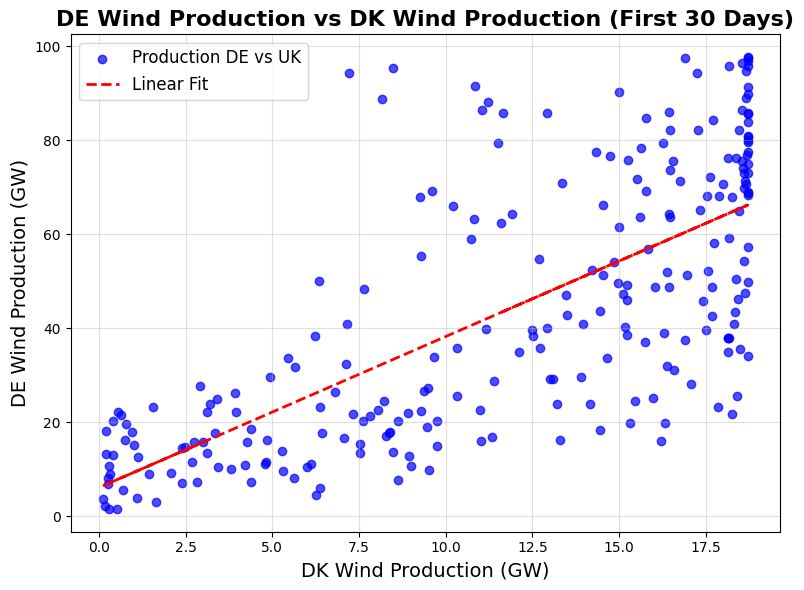

In [17]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np


# Charger le fichier pour batch_0001
path_wind = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_eol\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.Wind.nc"
data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)

# Extraire les variables pour la UK et l'Allemagne
wind_DK = data_wind['Wind_DK'].isel(time=slice(0, 248), lat=0, lon=0)  # UK
wind_DE = data_wind['Wind_DE'].isel(time=slice(0, 248), lat=0, lon=0)  # Allemagne

# Convertir les valeurs de W*10^10 en GW
wind_DK_GW = wind_DK / 1e9
wind_DE_GW = wind_DE / 1e9

# Calculer la regression linéaire et la plotter sur le graphe
slope, intercept = np.polyfit(wind_DK_GW, wind_DE_GW, 1)
fit = slope * wind_DK_GW + intercept
#plt.plot(wind_UK_GW, fit, color='red', linestyle='--', linewidth=2, label='Linear Fit')

# Créer un nuage de points (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(wind_DK_GW, wind_DE_GW, color='blue', alpha=0.7, label='Production DE vs UK')

#créer une ligne de pente 1 tout le long du graphe
#plt.plot([0, 100], [0, 100], color='red', linestyle='-', linewidth=2, label='1:1 Line')

plt.plot(wind_DK_GW, fit, color='red', linestyle='--', linewidth=2, label='Linear Fit')
# Ajouter un titre et des labels
plt.title("DE Wind Production vs DK Wind Production (First 30 Days)", fontsize=16, fontweight='bold')
plt.xlabel("DK Wind Production (GW)", fontsize=14)
plt.ylabel("DE Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()